In [3]:
    import hopsworks
    import pandas as pd
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import ConfusionMatrixDisplay
    import seaborn as sns
    from matplotlib import pyplot
    from hsml.schema import Schema
    from hsml.model_schema import ModelSchema
    import joblib
    import os
    from dotenv import load_dotenv, dotenv_values


BuFkHAqrcU68dqRm.XqIMxjU4u0UiNjLdGYgc4bwr6YeyLavHSHk24dRHWsfxBVTuv1sCRBqhZvP3tAvq


In [5]:
    # REPLACE .env WITH YOUR OWN KEY_VALUE
    config = dotenv_values(".env")
    key_value = config["KEY"]
    #print(key_value)

BuFkHAqrcU68dqRm.XqIMxjU4u0UiNjLdGYgc4bwr6YeyLavHSHk24dRHWsfxBVTuv1sCRBqhZvP3tAvq


In [44]:
# You have to set the environment variable 'HOPSWORKS_API_KEY' for login to succeed
project = hopsworks.login(api_key_value=key_value)
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/193692
Connected. Call `.close()` to terminate connection gracefully.


In [45]:
#CONSTRUCTS 'FEATURE VIEW' from 'FEATURE GROUP' that is already saved from before on hopsworks, LABELS coming into play now, remember feature group only had features
# The feature view is the input set of features for your model. The features can come from different feature groups.    
# You can select features from different feature groups and join them together to create a feature view
wine_fg = fs.get_feature_group(name="wine", version=1)
query = wine_fg.select_all()
feature_view = fs.get_or_create_feature_view(name="wine",
                                  version=1,
                                  description="Read from Wine quality dataset",
                                  labels=["quality"],
                                  query=query)

In [46]:
read_wine_csv = pd.read_csv("wine_final.csv")
read_wine_csv
y = read_wine_csv['quality']
print(y)

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64


In [54]:
feature_view.get_batch_data()

Finished: Reading data from Hopsworks, using Hive (3.89s) 


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,1,6.9,0.290,0.320000,5.8,0.040,16.0,112.0,0.99300,3.040000,0.580000,11.2
1,1,7.4,0.280,0.250000,11.9,0.053,25.0,148.0,0.99760,3.100000,0.620000,9.2
2,1,7.5,0.240,0.310000,13.1,0.050,26.0,180.0,0.99884,3.050000,0.530000,9.1
3,1,6.7,0.220,0.330000,1.2,0.036,36.0,86.0,0.99058,3.100000,0.760000,11.4
4,1,8.3,0.140,0.450000,1.5,0.039,18.0,98.0,0.99215,3.020000,0.560000,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5361,1,6.7,0.220,0.370000,1.6,0.028,24.0,102.0,0.99130,3.114707,0.590000,11.6
5362,0,7.0,0.540,0.094268,2.1,0.079,39.0,55.0,0.99560,3.390000,0.840000,11.4
5363,1,7.5,0.240,0.270998,13.0,0.049,46.0,217.0,0.99850,3.080000,0.530000,8.8
5364,1,6.8,0.220,0.350000,17.5,0.039,38.0,153.0,0.99940,3.188502,0.420000,9.0


In [53]:

# You can read training data, randomly split into train/test sets of features (X) and labels (y)  #train s
X_train, X_test, y_train, y_test = feature_view.train_test_split(test_size=0.2, stratify=y)           #80:20 split

# Train our model with the Scikit-learn K-nearest-neighbors algorithm using our features (X_train) and labels (y_train)
#model = KNeighborsClassifier(n_neighbors=2)     #CHANGE AS NEEDED
#model = DecisionTreeClassifier()
model = RandomForestClassifier() #(random_state=42)
model.fit(X_train, y_train.values.ravel())

TypeError: FeatureView.train_test_split() got an unexpected keyword argument 'stratify'

In [18]:
# Evaluate model performance using the features from the test set (X_test)
y_pred = model.predict(X_test)

# Compare predictions (y_pred) with the labels in the test set (y_test)
metrics = classification_report(y_test, y_pred, output_dict=True)
results = confusion_matrix(y_test, y_pred)

# PRINTS TO CHECK
print(model.classes_)
print("-------------------------------------------------------------------------")
print(results)
print("-------------------------------------------------------------------------")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100} %\n')
print("-------------------------------------------------------------------------")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("-------------------------------------------------------------------------")
print(model.feature_names_in_)

print("-------------------------------------------------------------------------")
unique_train_y = y_train['quality'].unique()
print("Unique Classes in y_train:", unique_train_y)

unique_test_y = y_test['quality'].unique()
print("Unique Classes in y_test:", unique_test_y)

[3 4 5 6 7 8 9]
-------------------------------------------------------------------------
[[  0   0   3   2   0   0]
 [  0   4  34   7   0   0]
 [  0   1 238 107   1   0]
 [  0   0 116 330  31   0]
 [  0   0  10 102  54   2]
 [  0   0   0  18  10   4]]
-------------------------------------------------------------------------
Accuracy: 58.659217877094974 %

-------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.80      0.09      0.16        45
           5       0.59      0.69      0.64       347
           6       0.58      0.69      0.63       477
           7       0.56      0.32      0.41       168
           8       0.67      0.12      0.21        32

    accuracy                           0.59      1074
   macro avg       0.53      0.32      0.34      1074
weighted avg       0.59      0.59      0.56      1074

-

[3, 4, 5, 6, 7, 8, 9]
<class 'list'>


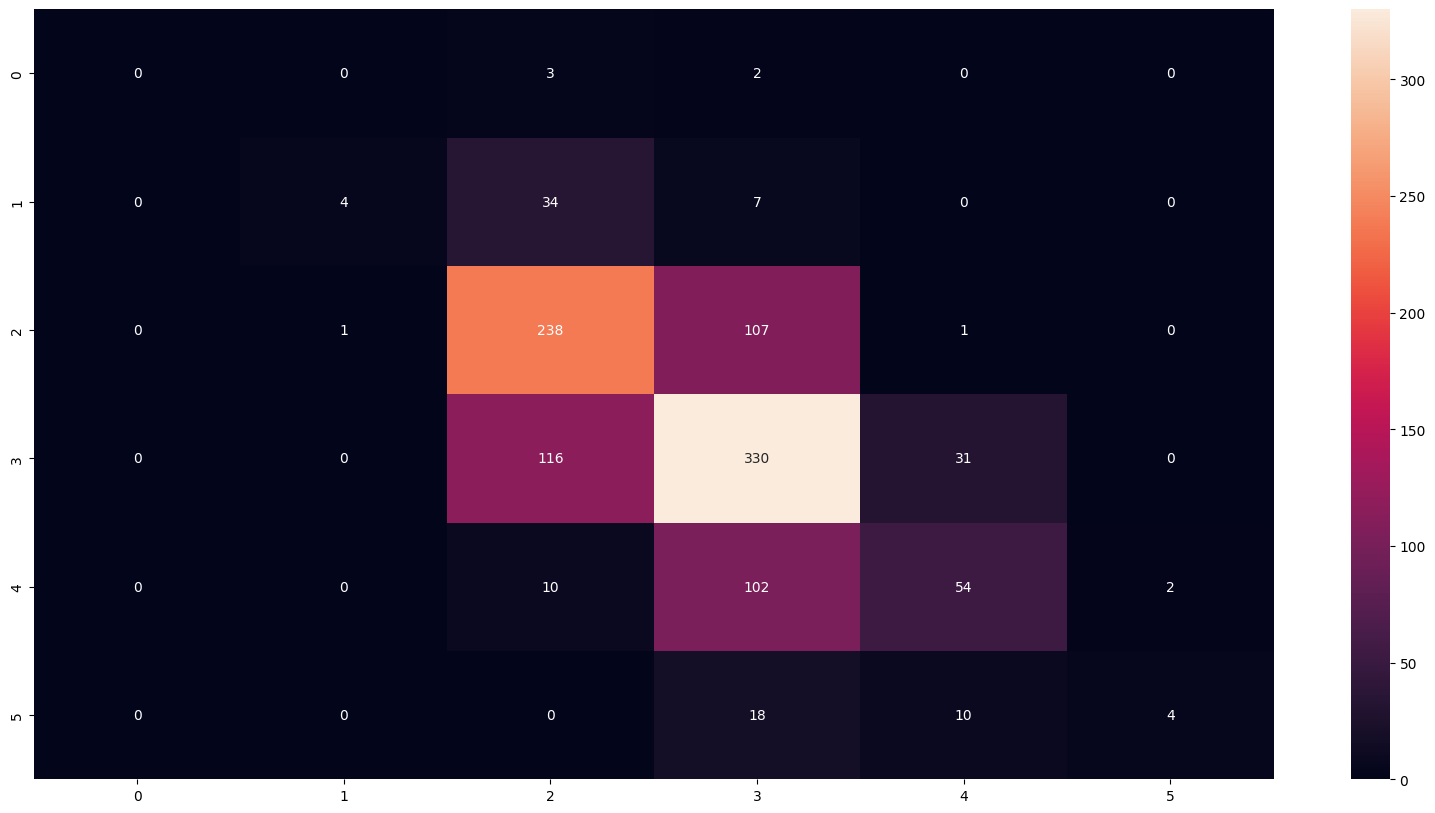

In [19]:
# Create the confusion matrix as a figure, we will later store it as a PNG image file

classes_list = model.classes_.tolist()
print(classes_list)
print(type(classes_list))

df_cm = pd.DataFrame(results)

# Create the heatmap
pyplot.figure(figsize=(20, 10))
cm = sns.heatmap(df_cm, annot=True, fmt="d")
fig = cm.get_figure()


In [90]:
# We will now upload our model to the Hopsworks Model Registry. First get an object for the model registry.
mr = project.get_model_registry()

# The contents of the 'wine_model' directory will be saved to the model registry. Create the dir, first.
model_dir="wine_model"
if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)

# Save both our model and the confusion matrix to 'model_dir', whose contents will be uploaded to the model registry
joblib.dump(model, model_dir + "/wine_model.pkl")       #binary serialization of model in python
fig.savefig(model_dir + "/wine_confusion_matrix.png")    

# Specify the schema of the model's input/output using the features (X_train) and labels (y_train)
input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema, output_schema)

# Create an entry in the model registry that includes the model's name, desc, metrics
wine_model = mr.python.create_model(
    name="wine_model", 
    metrics={"accuracy" : metrics['accuracy']},
    model_schema=model_schema,
    description="Wine Quality Predictor"
)

# Upload the model to the model registry, including all files in 'model_dir'
wine_model.save(model_dir)

Connected. Call `.close()` to terminate connection gracefully.


Uploading: 100.000%|██████████| 24764609/24764609 elapsed<00:23 remaining<00:0097it/s]
Uploading: 100.000%|██████████| 30465/30465 elapsed<00:01 remaining<00:001,  2.97it/s]
Uploading: 100.000%|██████████| 1066/1066 elapsed<00:01 remaining<00:001:00, 15.17s/it]
Model export complete: 100%|██████████| 6/6 [00:33<00:00,  5.53s/it]                   

Model created, explore it at https://c.app.hopsworks.ai:443/p/193692/models/wine_model/1


Model(name: 'wine_model', version: 1)